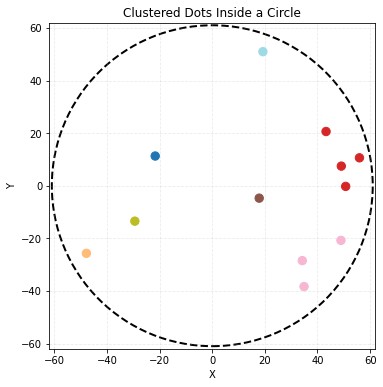

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def generate_points(n, r):
    theta = 2 * np.pi * np.random.rand(n)
    u = np.random.rand(n)
    radii = r * np.sqrt(u)
    x = radii * np.cos(theta)
    y = radii * np.sin(theta)
    points = np.column_stack((x, y))
    return points

def group_points(points, eps):
    clustering = DBSCAN(eps=eps, min_samples=1)
    clustering.fit(points)
    return clustering.labels_

def plot_circle(ax, r):
    circle = plt.Circle((0, 0), r, color='black', fill=False, linestyle='--', linewidth=2)
    ax.add_patch(circle)

def main():
    n = 12     # number of points
    r = 61      # radius of the circle
    eps = 20.0   # clustering threshold

    points = generate_points(n, r)
    labels = group_points(points, eps)

    fig, ax = plt.subplots(figsize=(6, 6))
    scatter = ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='tab20', s=70, zorder=2)
    plot_circle(ax, r)

    ax.set_aspect('equal', 'box')
    ax.set_xlim(-r - 1, r + 1)
    ax.set_ylim(-r - 1, r + 1)
    ax.set_title("Clustered Dots Inside a Circle")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True, linestyle='--', alpha=0.25)
    plt.show()

if __name__ == "__main__":
    main()


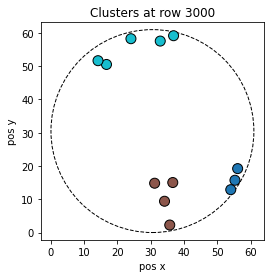

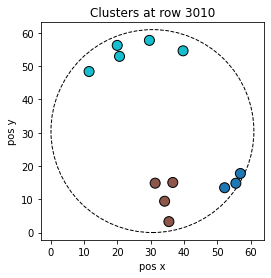

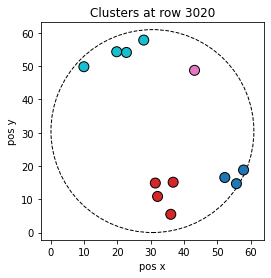

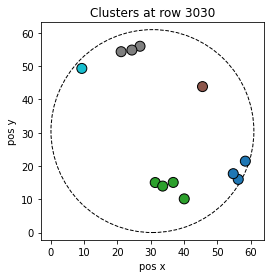

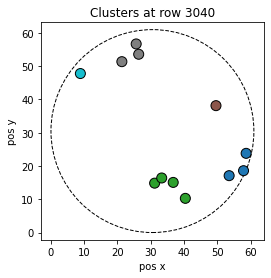

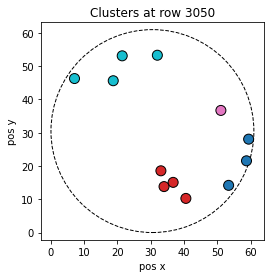

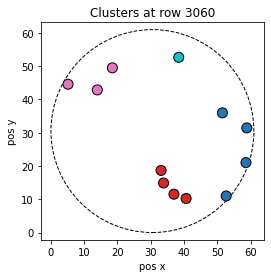

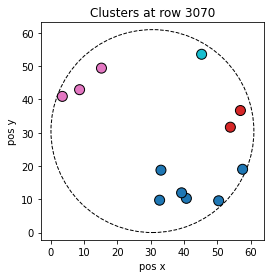

In [2]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# === PARAMETERS ===
folder_path = '/srv/milky/drosophila-datasets/drosophila-isolation/data/processed/0_0_preproc_data/CsCh/CsCh_A1_05_05_2023-11_21'

# random_integers = sorted([random.randint(1, 14400) for _ in range(20)])
random_integers = [3000, 3010, 3020, 3030, 3040, 3050, 3060, 3070]
epsilon = 12.0                    
radius = 61/2
center = (30.5, 30.5)

for n in random_integers:
    coordinates = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            if n < len(df):
                x = df.at[n, 'pos x']
                y = df.at[n, 'pos y']
                coordinates.append((x, y))

    points = np.array(coordinates)
    clustering = DBSCAN(eps=epsilon, min_samples=1).fit(points)
    labels = clustering.labels_
    plt.figure(figsize=(4, 4))
    circle = plt.Circle(center, radius, color='black', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(circle)
    scatter = plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='tab10', s=100, edgecolor='k')
    plt.xlabel('pos x')
    plt.ylabel('pos y')
    plt.title(f'Clusters at row {n}')
    plt.axis('equal')
    plt.grid(False)
    plt.show()